<a href="https://colab.research.google.com/github/Brandon-Bernal-Alarcon/Notas/blob/main/Machine%20Learning/Aprendizaje%20Supervisado/10_Cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross-validation

La validación cruzada estima el rendimiento promedio de un modelo usando múltiples particiones de los datos.

Evita depender de una sola división train/test.

Validación cruzada k-fold

Se divide el dataset en k pliegues, cada pliegue actúa una vez como test y se promedian las métricas

**Example based on k-NN classifier with fruit dataset (2 features)**

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load the fruit data
fruits = pd.read_table('/content/fruit_data_with_colors.txt')

# Prepare the X and y for the binary classification problem (using only height and width)
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else


clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.values
y = y_fruits_2d.values
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.75       0.75       0.83333333 0.83333333 0.81818182]
Mean cross-validation score (3-fold): 0.797


**Interpretación de los resultados**

- Cada valor es la precisión en un pliegue

- La media es una estimación más estable

- La variabilidad indica sensibilidad del modelo

**Validación cruzada estratificada**

En clasificación se preserva la proporción de clases en cada pliegue, evita sesgos por orden de los datos y Scikit-learn la usa por defecto.

**Cross-validation ≠ entrenamiento final**

Importante: la validación cruzada NO crea un nuevo modelo, solo evalúa rendimiento, el modelo final se entrena después, con todos los datos

**Escalado y cross-validation (nota importante)**

Escalar todo el dataset antes de CV causa data leakage

Solución correcta es escalar dentro de cada pliegue y usar Pipelines (tema posterior)

**Validation curve example**

Las validation curves permiten analizar cómo cambia el rendimiento del modelo al variar un hiperparámetro específico, usando validación cruzada. En SVM con kernel RBF, el parámetro gamma controla la complejidad del modelo. Comparando el desempeño en entrenamiento y validación cruzada es posible detectar overfitting, underfitting y seleccionar valores óptimos del hiperparámetro.

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [7]:
print(train_scores)

[[0.46153846 0.43589744 0.425     ]
 [0.84615385 0.71794872 0.75      ]
 [0.92307692 0.8974359  0.925     ]
 [1.         1.         0.975     ]]


In [9]:
print(test_scores)

[[0.5        0.3        0.31578947]
 [0.85       0.7        0.63157895]
 [0.55       0.85       0.68421053]
 [0.4        0.2        0.36842105]]


<>:11: SyntaxWarning: invalid escape sequence '\g'
<>:11: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-3433151704.py:11: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('$\gamma$ (gamma)')


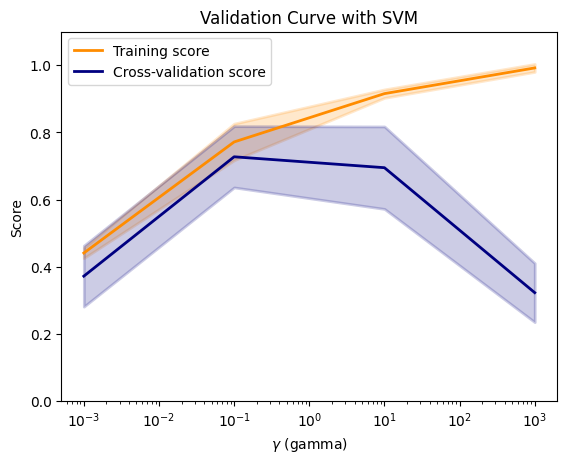

In [11]:
import matplotlib.pyplot as plt

plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

**La gráfica final permite identificar:**

Overfitting

- Training score alto

- CV score bajo

- Suele ocurrir con gamma grande

Underfitting

- Ambos scores bajos

- Suele ocurrir con gamma muy pequeño

Buen ajuste

- Training y CV scores altos y cercanos

- Zona óptima del hiperparámetro